## Exploration

Data exploration phase 1:
  - goal is to have a quick look at the data we have and see what the possibilities are.

In [1]:
import pandas as pd
import geopandas as gpd
from pathlib import Path
from zipfile import ZipFile

In [2]:
%matplotlib inline

In [3]:
raw_data_path = Path("../data/raw/")

In [4]:
zipped_file_path = raw_data_path.glob("*.zip")

_files = list(zipped_file_path)

_files

[WindowsPath('../data/raw/ne_110m_land.zip'),
 WindowsPath('../data/raw/PoliticalBoundaries_Shapefiles_NA_PoliticalDivisions_data_bound_l_boundary_l_v2.zip')]

In [5]:
zipped_file = ZipFile(_files[0])

In [6]:
extracted_files_path = Path("../data/interim/extracted/")

In [7]:
zipped_file.extractall(extracted_files_path)

In [8]:
shp_file_path = Path("../data/interim/extracted/PoliticalBoundaries_Shapefiles/NA_PoliticalDivisions/data/bound_l/boundary_l_v2.shp")

In [9]:
geo_data = gpd.read_file(shp_file_path)


geo_data.head()

,UIDENT,TYPE,COUNTRY,EDIT_DATE,EDIT,Shape_Leng,geometry
0,322503,89,NONE,20100505,EDT,62.979705,LINESTRING (-98.0262000001967 4876135.24529999...
1,322003,89,NONE,20060803,NEW,94.912816,LINESTRING (70.51380000077188 4876078.41609999...
2,321903,89,NONE,20060803,NEW,59.147203,"LINESTRING (-70.27270000055432 4876079.8682, -..."
3,322203,89,NONE,20060803,NEW,97.050758,LINESTRING (-18.99719999916852 4876052.1510000...
4,322603,89,NONE,20100505,EDT,334.952718,LINESTRING (99.73960000090301 4876165.00539999...


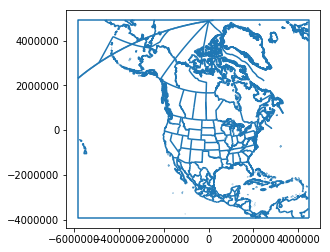

In [10]:
geo_data.plot();

In [11]:
geo_data['COUNTRY'].unique()

array(['NONE', 'FN', 'USA', 'CAN USA', 'MEX USA', 'MEX', 'MEX FN', 'CAN'],
      dtype=object)

In [12]:
countries_of_interest = ['USA', 'CAN USA', 'MEX USA', 'MEX', 'MEX FN', 'CAN']

In [13]:
geo_data = geo_data[geo_data['COUNTRY'].isin(countries_of_interest)].copy()

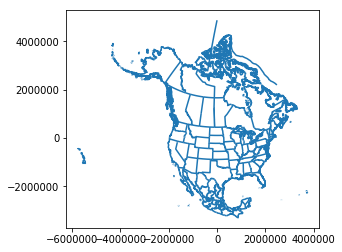

In [14]:
geo_data.plot()

In [15]:
geo_data.head()

,UIDENT,TYPE,COUNTRY,EDIT_DATE,EDIT,Shape_Leng,geometry
229,78003,15,USA,20060803,NEW,757494.054854,"LINESTRING (-1937875.3674 3685747.511499999, -..."
236,125303,15,USA,20060803,NEW,76974.930032,"LINESTRING (-1751988.9913 3468951.506999999, -..."
237,114203,15,USA,20060803,NEW,20261.889383,"LINESTRING (-1979405.4978 3713896.2557, -19792..."
239,114003,15,USA,20060803,NEW,50408.376009,LINESTRING (-1996949.747199999 3722926.5102999...
240,129603,15,USA,20060803,NEW,12068.200816,"LINESTRING (-1654872.2413 3349171.998600001, -..."


In [16]:
geo_data['TYPE'].unique()

array([15, 12, 16, 36, 10, 11, 39], dtype=int64)

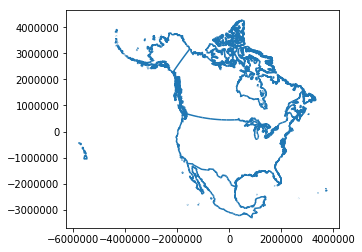

In [17]:
geo_data[geo_data['TYPE'] < 17].plot();

In [18]:
outline_data = geo_data[geo_data['TYPE'] <= 16].copy()

From the plot above we can see a lot of whitespace between the mainland United States and Hawai'i as well as other smaller islands in the east. For the sake of cleanliness we can drop them.<br> 
We can filter our `GeoDataFrame` by its geographical features. 

In [26]:
outline_data.crs

{'proj': 'laea',
 'lat_0': 45,
 'lon_0': -100,
 'x_0': 0,
 'y_0': 0,
 'a': 6370997,
 'b': 6370997,
 'units': 'm',
 'no_defs': True}

The coordinate system of our `GeoDataFrame` is ***"Lambert Azimuthal Equal Area"*** and it's using ***meters*** as it's unit. With that in mind and by looking at our previous plot we can *crop* our data to be only between -5,000,000 and 3,200,000 in the x-axis. These numbers are arbitrary and you could choose whatever number you would like. Our y-axis is fine as it is for this project.

To do the *cropping* we will use the `.bounds` attribute of our `geometry` column. This returns a 4 column `dataframe` with the min and max values for x and y.

In [27]:
outline_data['geometry'].bounds

,minx,miny,maxx,maxy
229,-1.944367e+06,3.468952e+06,-1.737933e+06,3.710593e+06
236,-1.751989e+06,3.444321e+06,-1.719891e+06,3.468952e+06
237,-1.988208e+06,3.713896e+06,-1.979165e+06,3.717945e+06
239,-2.009153e+06,3.722927e+06,-1.996605e+06,3.742351e+06
240,-1.657354e+06,3.349172e+06,-1.653864e+06,3.352558e+06
241,-1.563645e+06,3.260769e+06,-1.555412e+06,3.265822e+06
242,-1.741625e+06,3.300739e+06,-1.619219e+06,3.444321e+06
243,-2.063617e+06,3.741086e+06,-2.015903e+06,3.746456e+06
247,-2.093803e+06,3.734149e+06,-2.067914e+06,3.741056e+06
251,-1.619219e+06,3.163406e+06,-1.512033e+06,3.300739e+06


We can use this to create a `mask` for our `dataframe` in order to *filter* out the values that we do not wish to maintain. 

In [28]:
condition_one = (outline_data['geometry'].bounds['minx'] > -5_000_000)
condition_two = (outline_data['geometry'].bounds['minx'] < 3_200_000)

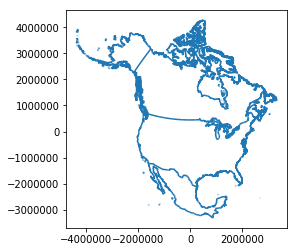

In [30]:
outline_data[condition_one & condition_two].plot();

***
Checkpoint. We have our data ready to be exported to `GeoJSON` for later use in `altair`.

In [31]:
import json

In [56]:
# first we transform it to EPSG:4326, a format altair knows
_outline_data = outline_data[condition_one & condition_two]
_outline_data = _outline_data.to_crs({'init': 'epsg:4326'})
_outline_data = _outline_data[_outline_data['geometry'].bounds['maxx'] < -50].copy()  # in epsg:4326 some of the islands move to the right (diff cutoff points)

outline_json = json.loads(_outline_data.to_json())
outline_data_path = Path('../data/interim/outline_4326.geojson')

with open(outline_data_path, "w") as file:
    json.dump(outline_json, file, indent=4)

***
`matplotlib` visualizations

In [37]:
import geoplot.crs as gcrs
import geoplot
import matplotlib.pyplot as plt

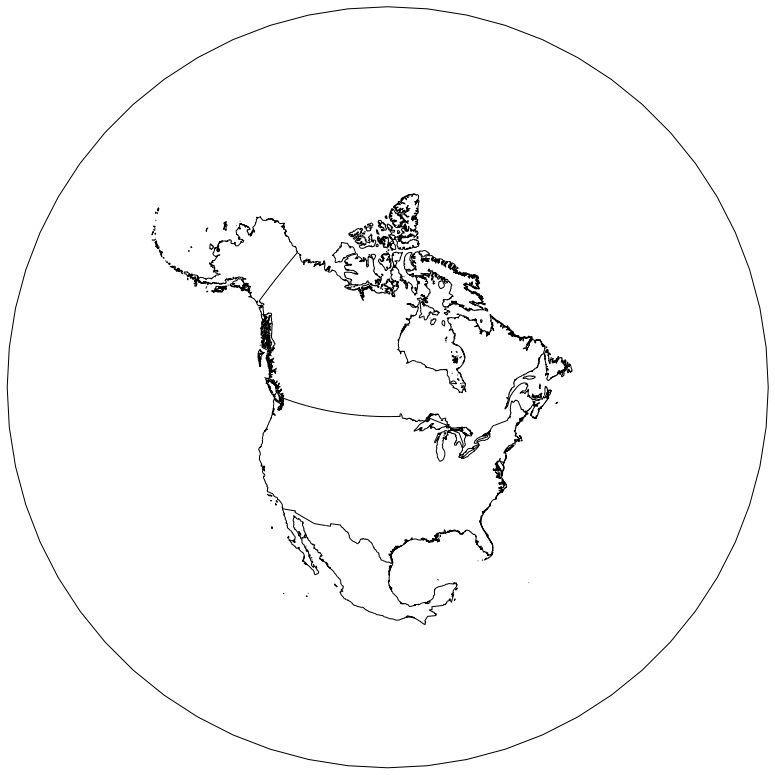

In [42]:
ax = geoplot.polyplot(_outline_data, projection=gcrs.Orthographic(central_longitude=-98), figsize=(18, 14),)
ax.set_global()
ax.outline_patch.set_visible(True)

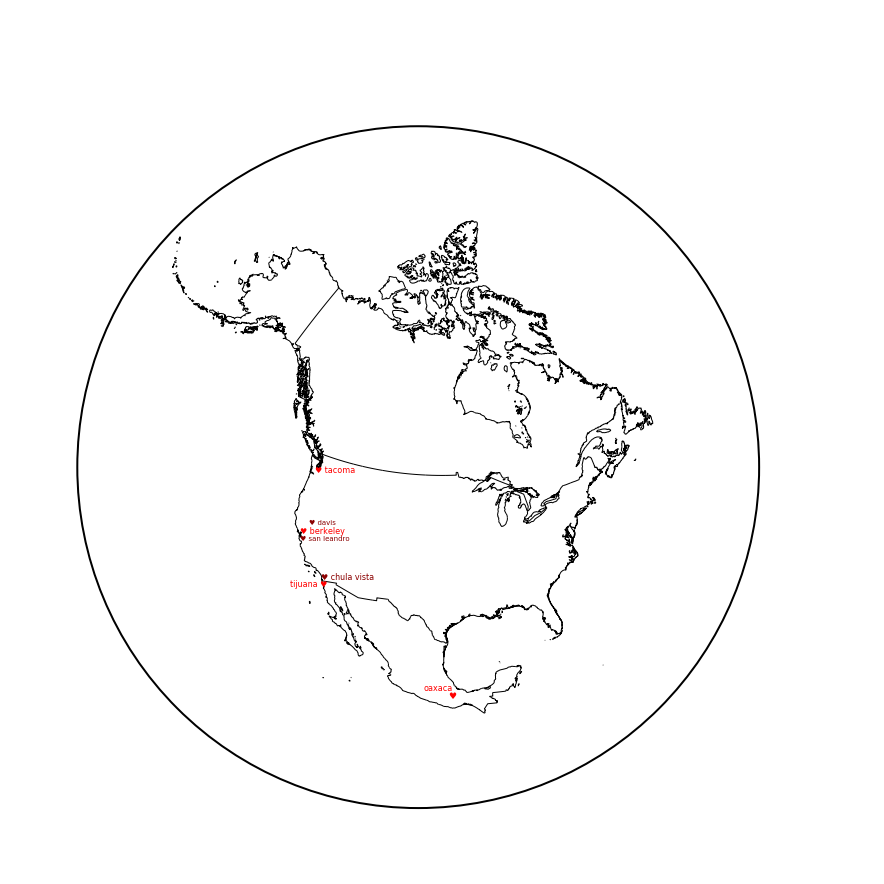

In [43]:
ax = geoplot.polyplot(_outline_data, projection=gcrs.Orthographic(central_longitude=-98), figsize=(16, 16), )
ax.set_global()
circle1 = plt.Circle((-350000,-370000), radius= 5000000, fill=False, linewidth = 2)
ax.add_artist(circle1)
ax.outline_patch.set_visible(False)

plt.text(0.354, .467, '♥ tacoma', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontdict = {'color': 'red', 'size':8});
plt.text(0.516, .207, '♥', horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, fontdict = {'color': 'red', 'size':9});
plt.text(0.512, .212, 'oaxaca', horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes, fontdict = {'color': 'red', 'size':8});
plt.text(0.337, .392, '♥ berkeley', horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes, fontdict = {'color': 'red', 'size':8});
plt.text(0.347, .403, '♥ davis', horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes, fontdict = {'color': 'darkred', 'size':7});
plt.text(0.337, .392, '♥ san leandro', horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontdict = {'color': 'darkred', 'size':7});
plt.text(0.361, .349, '♥ chula vista', horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontdict = {'color': 'darkred', 'size':8});
plt.text(0.368, .342, 'tijuana ♥', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontdict = {'color': 'red', 'size':8});


#ax.set_xlim(-4000000, 3300000)
#ax.set_ylim(-4500000, 3500000)

plt.savefig("../reports/figures/interim/rough_3.png", dpi = 600, )